In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimentalanalysis/cleanertweets.csv


## Loading data and libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('../input/sentimentalanalysis/cleanertweets.csv')

In [4]:
df.head()

,date,content,hashtags
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']"
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']"
2,2021-08-06,Secretary team is sleeping in the job a usual,['wfh']
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,['WFH']
4,2021-08-06,Salesforce Apex Programming tutorial t,"['superbadge', 'JN', 'JornalNacional', 'salesforcejobs', 'salesforceconsultant', 'SalesforceCPQ', 'lookingfornewjob', 'COVID19', 'lostjob', 'wfh']"


In [5]:
df.shape

(735253, 3)

In [6]:
df = df.head(150000)

Taking latest 150000 tweets to analyze the sentiment. Reducing data set will help to get results faster. It took almost 5 hours to train this number of tweets.

In [7]:
df.tail()

,date,content,hashtags
149995,2020-12-30,I entered the December Amazon Gift Card from job Spread the word and help lower unemployment,"['giveaway', 'remotejobs', 'remotework', 'WFH']"
149996,2020-12-30,can you guy do some investigative reporting on Spectrum th outage this month People could start losing their job since they can t reliably anymore,"['WFH', 'spectrumoutage']"
149997,2020-12-30,Media covered my research Collaborations Leadership Stepping up for the Continuous ethic application almost all month s round while maintaining essential work through shutdown Thanks to all who contributed amp for the wild ride,"['team', 'wfh', 'COVID']"
149998,2020-12-30,Lead CKD Care Coordinator Alignment Healthcare,"['jobs', 'opportunity', 'WFH']"
149999,2020-12-30,Have you ever tried working while someone cute readjusts your office chair while asking what each button doe It s awesome,"['ldnont', 'wfh']"


We can see that last data is 30 Dec 2020. So we have the dataset containing tweets for 2021. 

## HuggingFace Pipeline
Instead of importing entire transformer library, with HuggingFace a pipeline of pretrained model can be called that gives an API for that model. 'sentiment-analysis' is based on DistillBert model with fine tuned on SST2. Ref: [here](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)

In [8]:
#Importing the pipeline from Transformers.
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

In [9]:
#Passing the tweets into the sentiment pipeline and extracting the sentiment score and label
df = (df.assign(sentiment = lambda x: x['content'].apply(lambda s: sentiment_classifier(s)))
.assign(
label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))))

df.to_csv('./classifiedtweets.csv')

In [10]:
df.head()

,date,content,hashtags,sentiment,label,score
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']","[{'label': 'POSITIVE', 'score': 0.9914833307266235}]",POSITIVE,0.991483
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']","[{'label': 'POSITIVE', 'score': 0.9915953874588013}]",POSITIVE,0.991595
2,2021-08-06,Secretary team is sleeping in the job a usual,['wfh'],"[{'label': 'NEGATIVE', 'score': 0.93900066614151}]",NEGATIVE,0.939001
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,['WFH'],"[{'label': 'POSITIVE', 'score': 0.9788953065872192}]",POSITIVE,0.978895
4,2021-08-06,Salesforce Apex Programming tutorial t,"['superbadge', 'JN', 'JornalNacional', 'salesforcejobs', 'salesforceconsultant', 'SalesforceCPQ', 'lookingfornewjob', 'COVID19', 'lostjob', 'wfh']","[{'label': 'POSITIVE', 'score': 0.7067654132843018}]",POSITIVE,0.706765


We can see that columns: sentiment, label, and score is added to dataframe. Label gives us the information if the tweet is positive or negative. The score value of 1 means the label is correctly assigned. The lower the score worse will be prediction. 

Content in row 0, 1, and 3 is correctly assigned as Positive sentiment. Row 4 is a vague with Positive label. However, the score value is also less for the same. 

Content in row 2 also makes sense with Negative label. 

## Sentiment Visualization

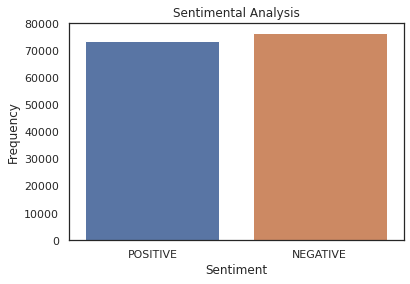

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.countplot(x="label", data=df)

plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

plt.show()

From analyzing tweets, we can see that the sentiment of people towards 'work from home' is equally divided. However, the model accuracy can be improved by labeling some of the tweets. It is possible that neutral tweets are recognized as negative and hence it is slightly higher than positive sentiments.

In [12]:
# Changing label to Neutral for score less yhan 0.9

for i in range(len(df['label'])):
    if df['score'][i] < 0.9:
        df['label'][i]='NEUTRAL'
    else:
        pass

I am converting sentiment to neutral for all the sentiments with score less than 0.9. 

In [13]:
df.head()

,date,content,hashtags,sentiment,label,score
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']","[{'label': 'POSITIVE', 'score': 0.9914833307266235}]",POSITIVE,0.991483
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']","[{'label': 'POSITIVE', 'score': 0.9915953874588013}]",POSITIVE,0.991595
2,2021-08-06,Secretary team is sleeping in the job a usual,['wfh'],"[{'label': 'NEGATIVE', 'score': 0.93900066614151}]",NEGATIVE,0.939001
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,['WFH'],"[{'label': 'POSITIVE', 'score': 0.9788953065872192}]",POSITIVE,0.978895
4,2021-08-06,Salesforce Apex Programming tutorial t,"['superbadge', 'JN', 'JornalNacional', 'salesforcejobs', 'salesforceconsultant', 'SalesforceCPQ', 'lookingfornewjob', 'COVID19', 'lostjob', 'wfh']","[{'label': 'POSITIVE', 'score': 0.7067654132843018}]",NEUTRAL,0.706765


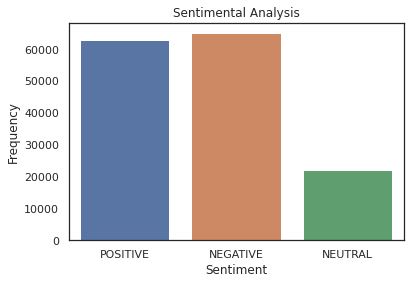

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.countplot(x="label", data=df)

plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

plt.show()

We can see that there is no clear change in positive to negative sentiment. Almost equal number to sentiment from both is converted to neutral. This could be the limitation of pre-trained model. this can be improved by training the model in the labeled tweets.

In [15]:
df.to_csv('./classifiedtweets2.csv')

##  WordCloud

In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

# ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
def Display_WordCloud(Column):
    words = " ".join(Column)

    def punctuation_stop(text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in (stop_words)  and w.isalpha() :
                filtered.append(w.lower())
        return filtered


    words_filtered = punctuation_stop(words)
    text = " ".join([ele for ele in words_filtered])
    wc= WordCloud(background_color="black", random_state=1,
                  stopwords=STOPWORDS, max_words = 2000, width =2500, height = 2500)
    wc.generate(text)

    plt.figure(figsize=[8,8])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

In [18]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#cleaning hashtag column
def hashtag(text):
    text = text[1:-1]
    text = text.replace("'", "")
    return text

In [20]:
df['hashtags'] = df['hashtags'].apply(lambda x: hashtag(str(x)))

In [21]:
df.head()

,date,content,hashtags,sentiment,label,score
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"workingfromhome, WFH, homeoffice, homeschooling, COVID, lockdown2021, studyfromhome, homeschooling","[{'label': 'POSITIVE', 'score': 0.9914833307266235}]",POSITIVE,0.991483
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"SidharthMalhotra, Casual, Bollywood, WFH","[{'label': 'POSITIVE', 'score': 0.9915953874588013}]",POSITIVE,0.991595
2,2021-08-06,Secretary team is sleeping in the job a usual,wfh,"[{'label': 'NEGATIVE', 'score': 0.93900066614151}]",NEGATIVE,0.939001
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,WFH,"[{'label': 'POSITIVE', 'score': 0.9788953065872192}]",POSITIVE,0.978895
4,2021-08-06,Salesforce Apex Programming tutorial t,"superbadge, JN, JornalNacional, salesforcejobs, salesforceconsultant, SalesforceCPQ, lookingfornewjob, COVID19, lostjob, wfh","[{'label': 'POSITIVE', 'score': 0.7067654132843018}]",NEUTRAL,0.706765


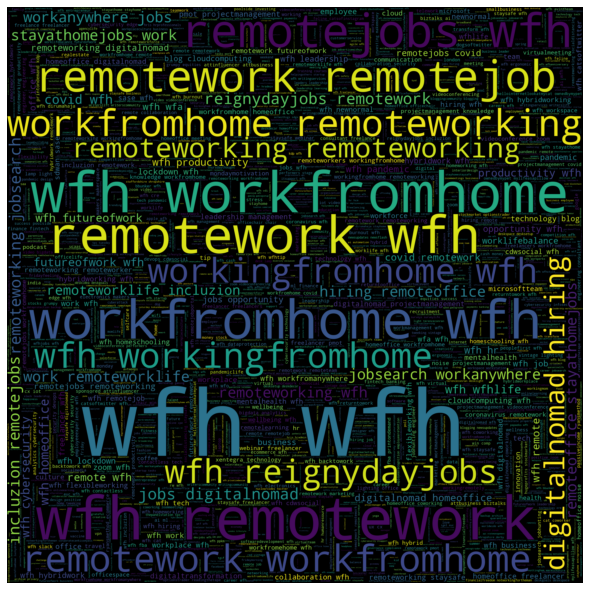

In [22]:
Display_WordCloud(df['hashtags'])

From the wordcloud we can see that wfh or work from home hashtag is the most common which aslo make sense because we scaped tweets with wfh hashtag. Other common hashtags include remotework, stayathome, remotejobs, worklifebalance, digitalnomad. 

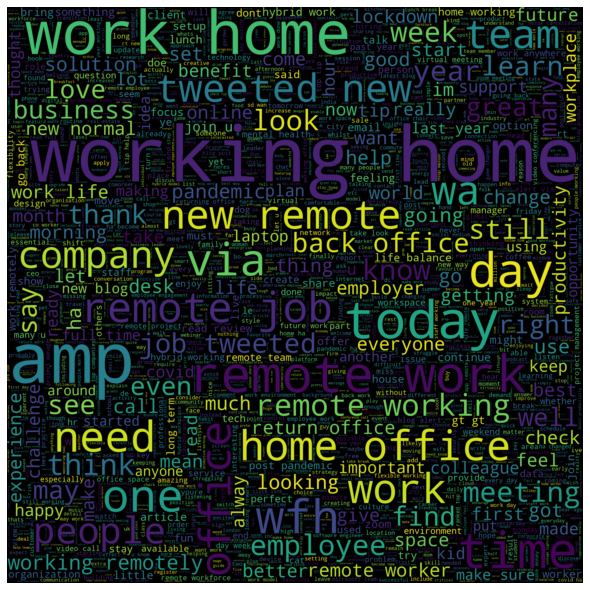

In [23]:
Display_WordCloud(df['content'])

The content carries words such as work home, home office, remote, new normal, pandemic etc. All those words make sense as remote jobs is the new normal after the pandemic. Most of the people are working from home. 